# GG4257 - Urban Analytics
---
## Assignment 2
---

### Lab 5: Intro to Networks

Lab 5 served as an introduction to networks, how to create them, traverse them, and then how to gather information about street networks using OpenStreetMap. There were two challenges for this lab, both with multiple steps and stages so I split them up as I feel works best here.

### Contents:

- <a href="#All-packages-needed-to-run-this-code:">Packages</a>
- <a href="#Challenge-1:">Challenge 1</a>
- <a href="#Challenge-2:-Using-OSMnx">Challenge 2</a>

---


### All packages needed to run this code:

In [ ]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import nxviz as nv
import osmnx as ox
from IPython.display import Image
import geopandas as gpd
import warnings

---

### Challenge 1: 
1. Read the GitHub network dataset.

In [ ]:
with open('data/lab5/github_users.p', 'rb') as f:
    gitNetwork = pickle.load(f) #formerly T =
gitNetwork

2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network

In [ ]:
print(len(gitNetwork))# the size of the graph/the number of nodes
print(len(gitNetwork.edges())) # the number of edges

3. Calculate the **degree centrality** of the GitHub collaboration network G. Using the .values() method of the network (e.g. G), extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the network.

In [ ]:
degree_centrality = nx.degree_centrality(gitNetwork) # this puts them into a dictionary, we want a list
centrality_list = degree_centrality.values() # dictionary to a list!

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(centrality_list, density=True, bins=30) 
plt.title('Distribution of degrees of centrality')
plt.xlabel('Degree of centrality')
plt.ylabel('Frequency')
plt.show()

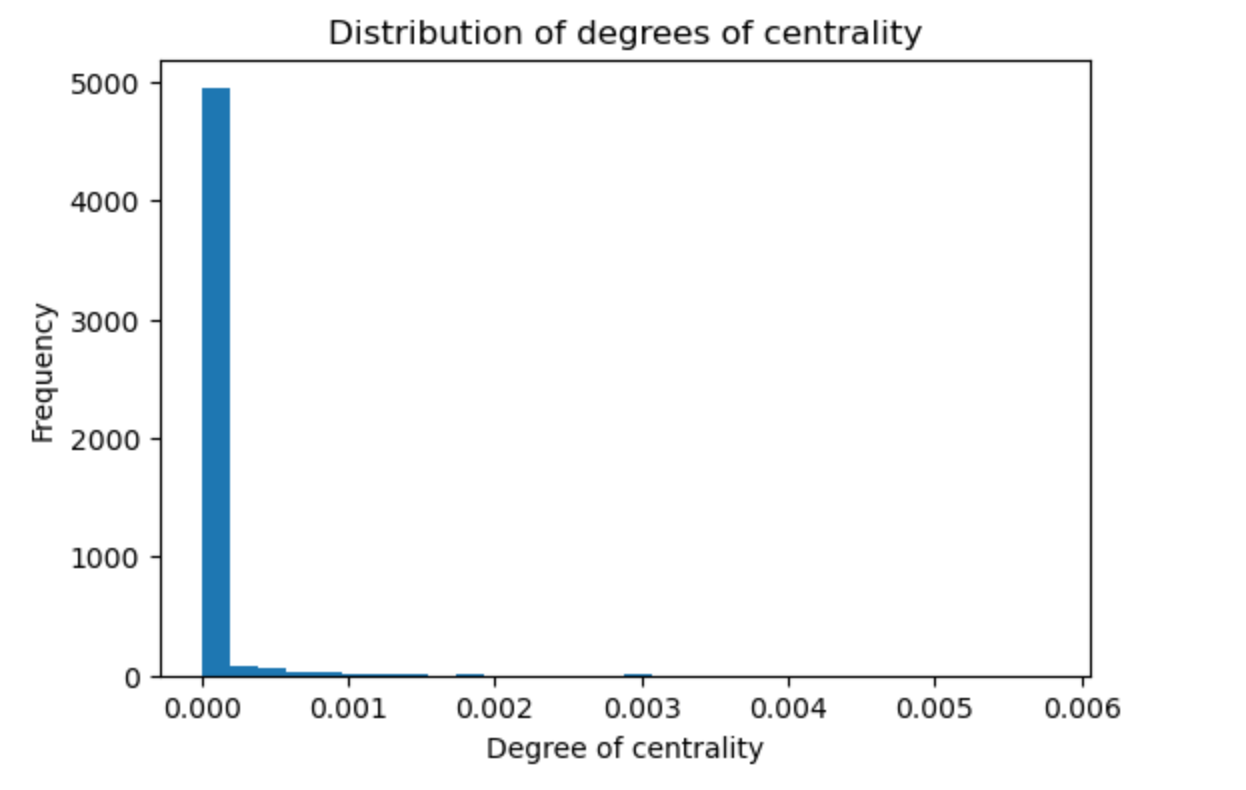

4. Make a subset of the initial network (e.g. Gh_sub), where you include at least five nodes and their corresponding edges. Experiment with multiple nodes so you have a graph with enough edges to work on.

In [ ]:
G_edges=gitNetwork.edges(['u1','u2','u3','u4','u5'], data=True) #subsets all the edges that involve these nodes

In [ ]:
G_subset = nx.DiGraph()
G_subset.add_edges_from(G_edges) 
len(G_subset) # total of 125 edges - enough to work with

5. Plot the subset graph created.

In [ ]:
plt.figure(figsize=(6,6))
nx.draw(G_subset, with_labels=True)
plt.show() # plotting the subsetted graph

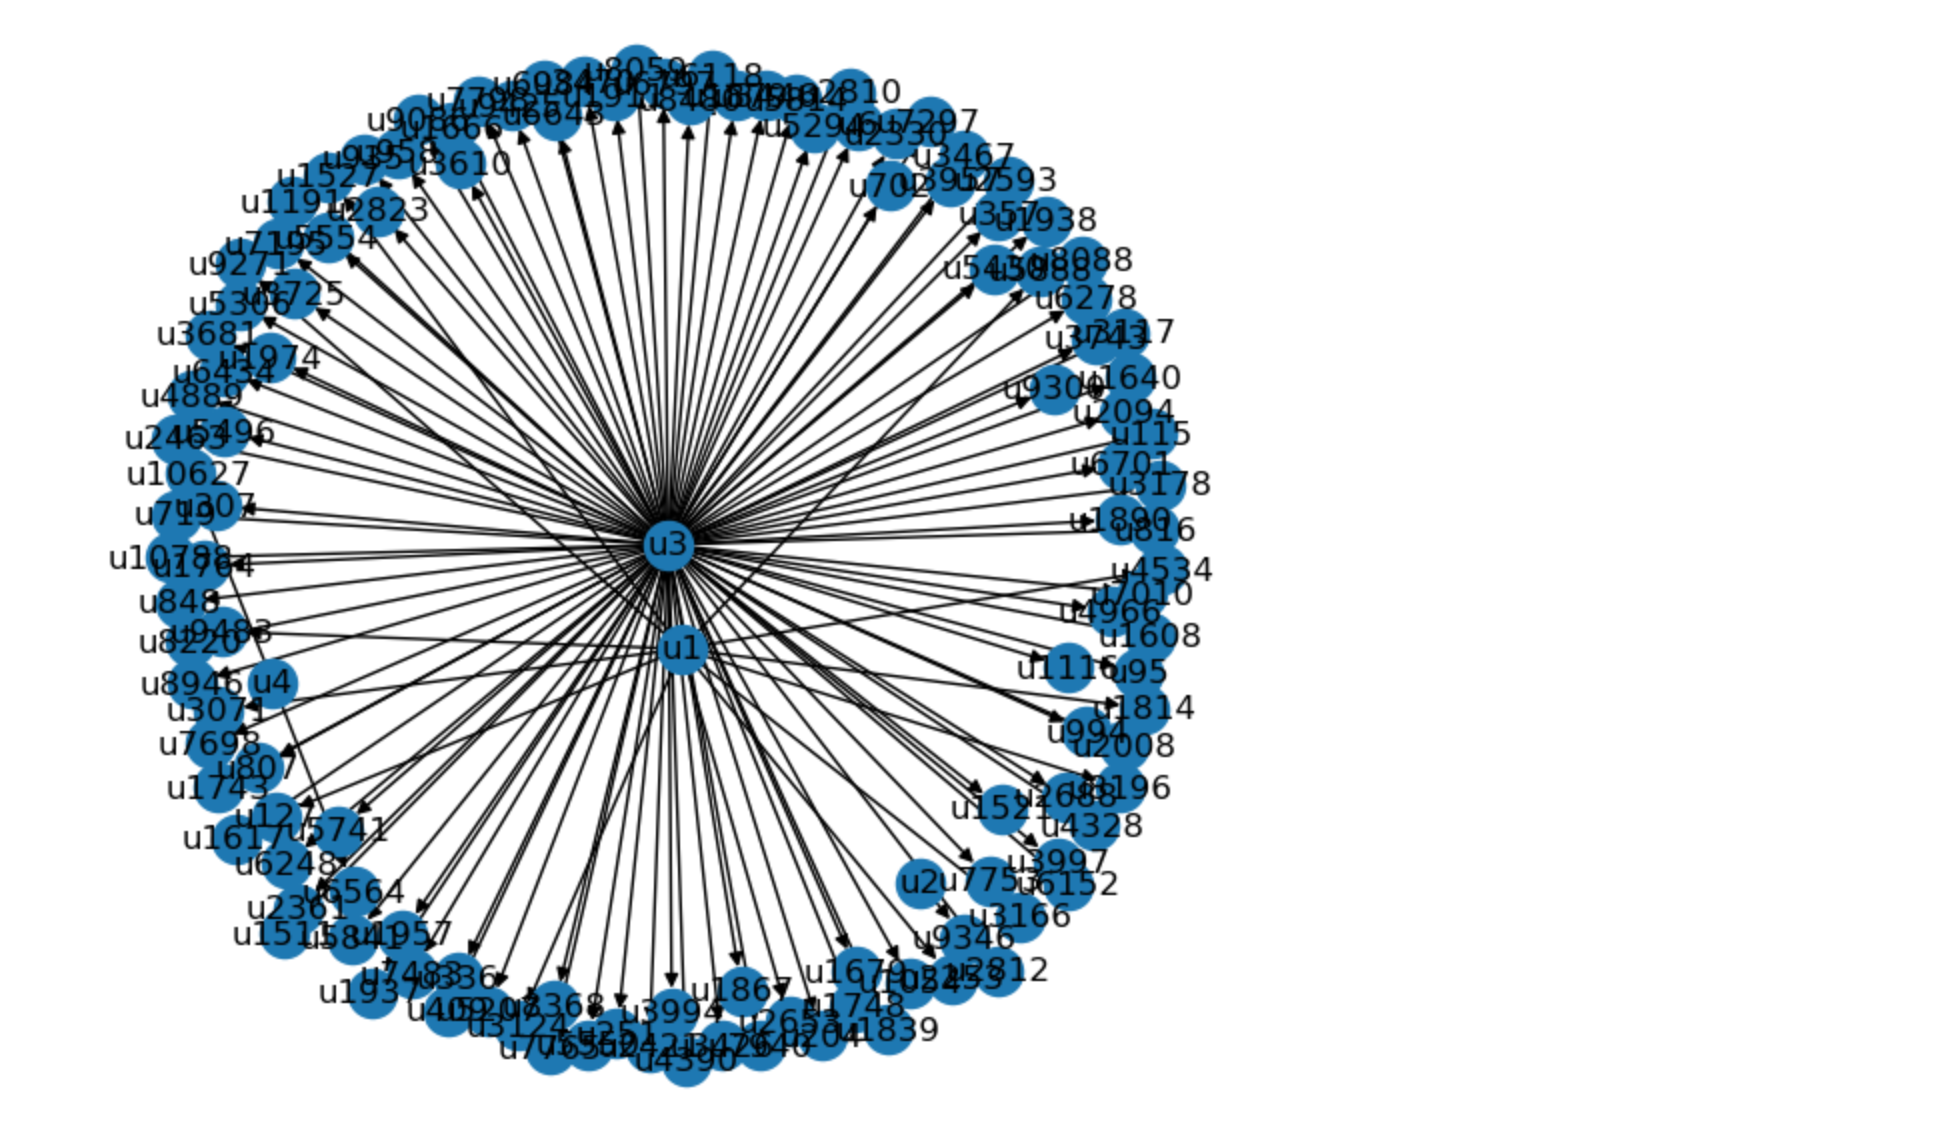

6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`

In [ ]:
between_centrality = nx.betweenness_centrality(G_subset) # calculates the betweenness centrality
between_centrality_list = between_centrality.values() # dictionary to a list!

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(between_centrality_list, density=True, bins=30) 
plt.title('Distribution of betweenness centrality')
plt.xlabel('Degree of betweenness centrality')
plt.ylabel('Frequency')
plt.show()

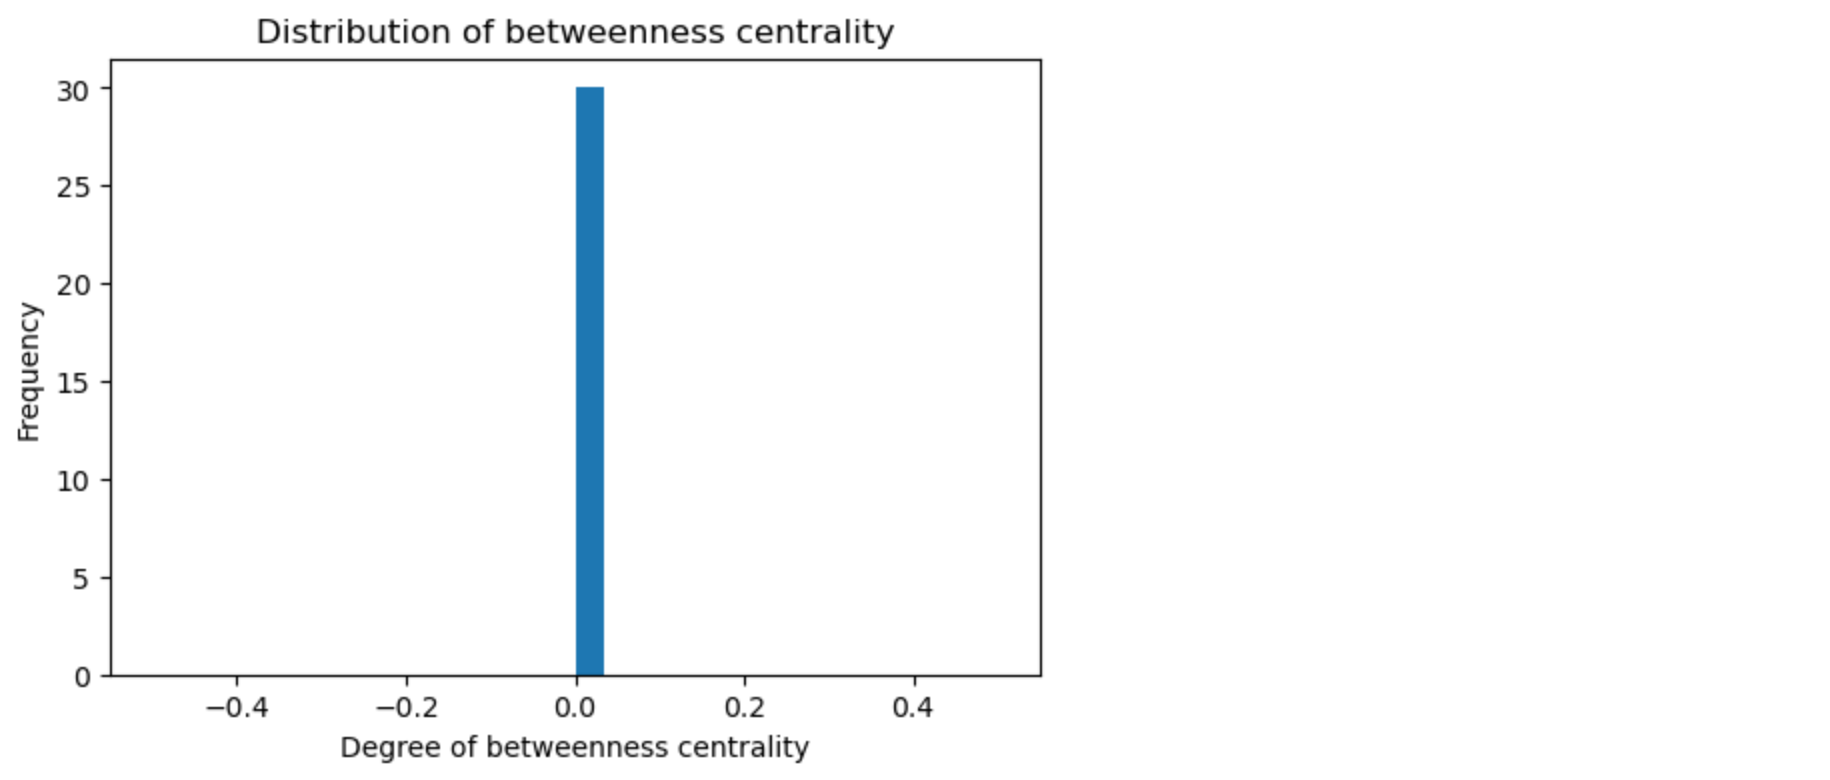

7. Plot the Matrix, Arc and Circos from the subset.

In [ ]:
nv.MatrixPlot(G_subset) # matrix plot
plt.show()

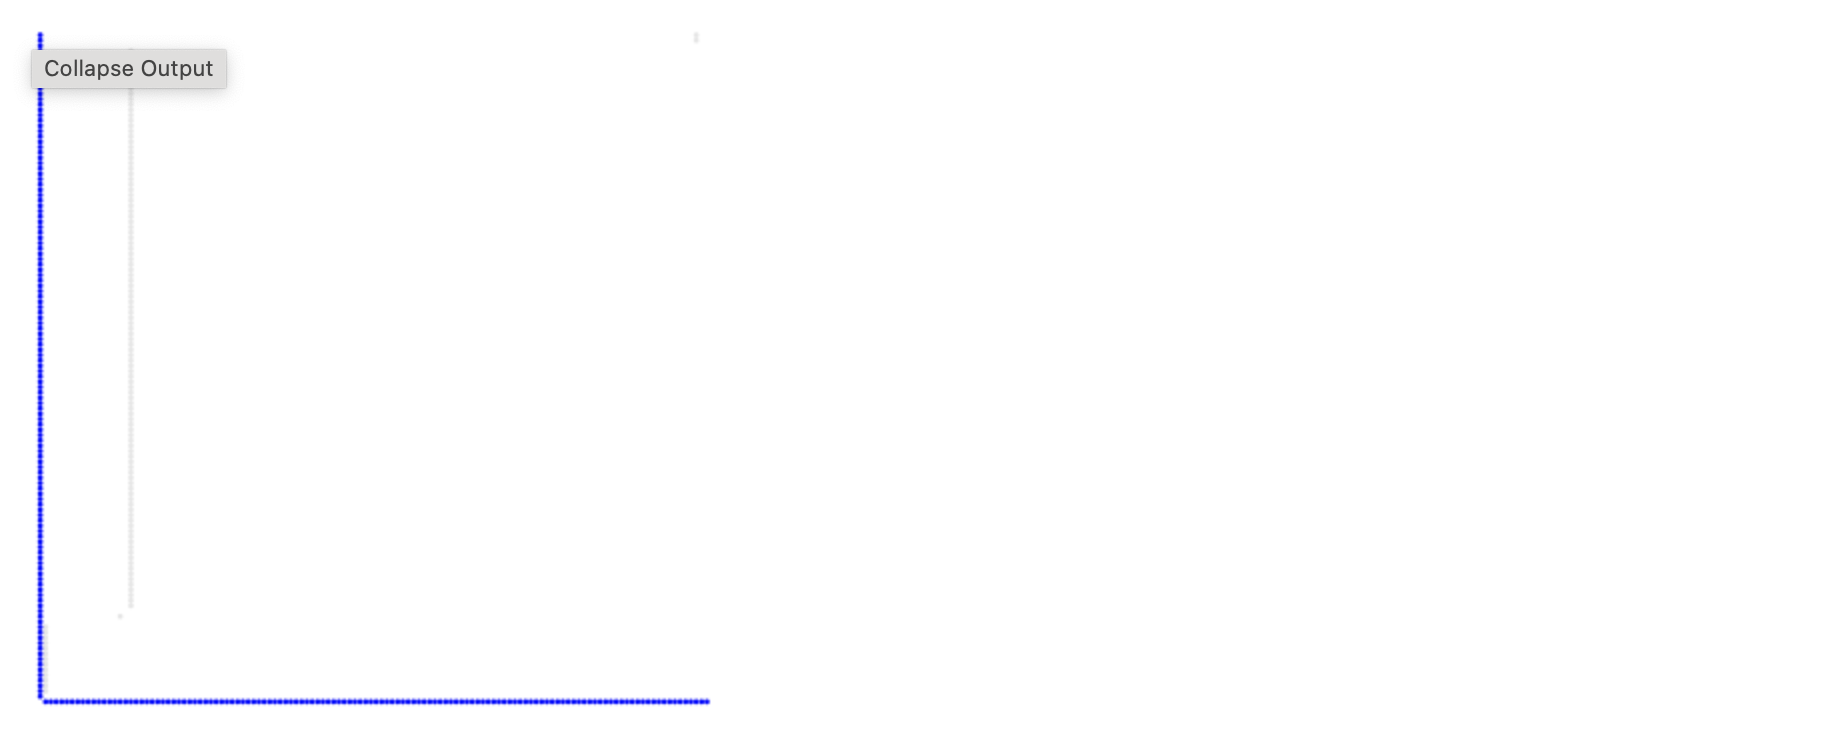

In [ ]:
nv.ArcPlot(G_subset) # arc plot
plt.show()

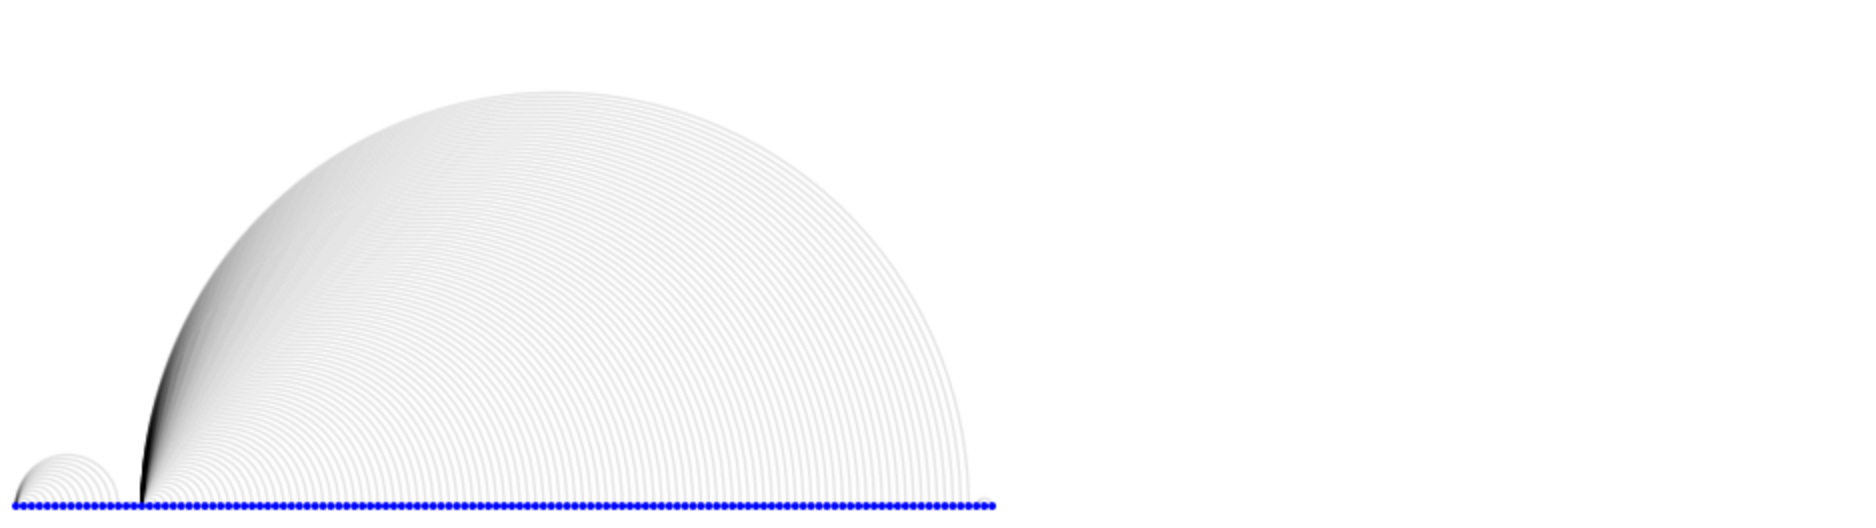

In [ ]:
nv.CircosPlot(G_subset) # circos plot
plt.show()

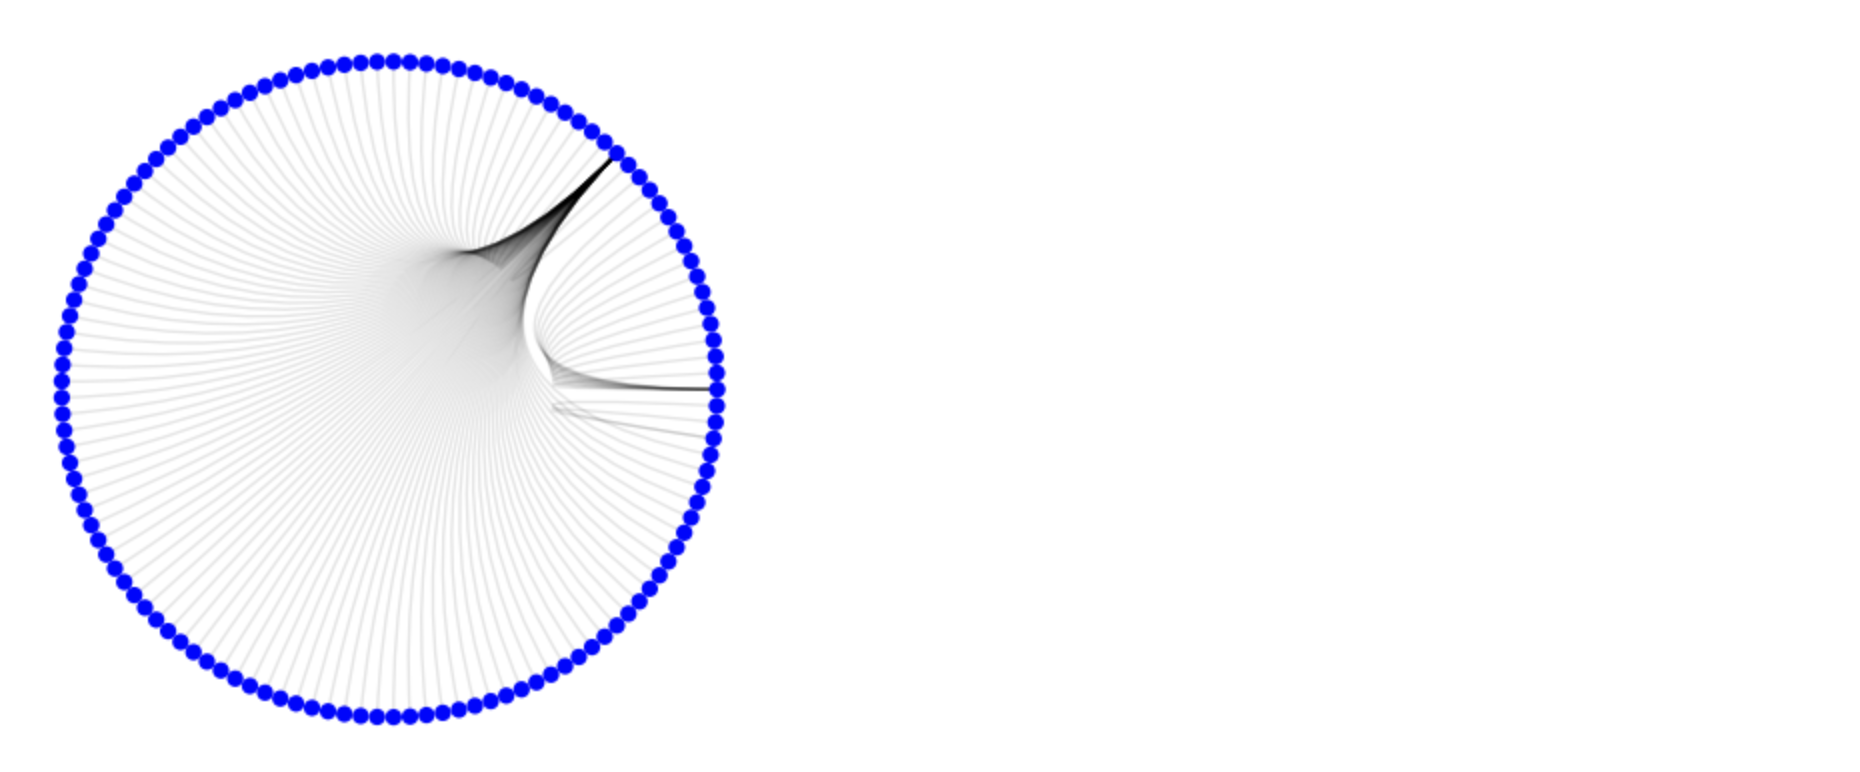

### Challenge 2: Using OSMnx
1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.

In [ ]:
# Deciding to do York, England
H = ox.graph_from_place("York, England", network_type="drive")

2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.

In [ ]:
print(len(H.nodes))
print(len(H.edges))
#print(H.degree) # unsure how to get average? - also result in mega

3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot

In [ ]:
fig, ax = ox.plot_graph(H, bgcolor="#111111", node_color='blue', node_size=1, edge_color='pink', edge_linewidth=0.5)

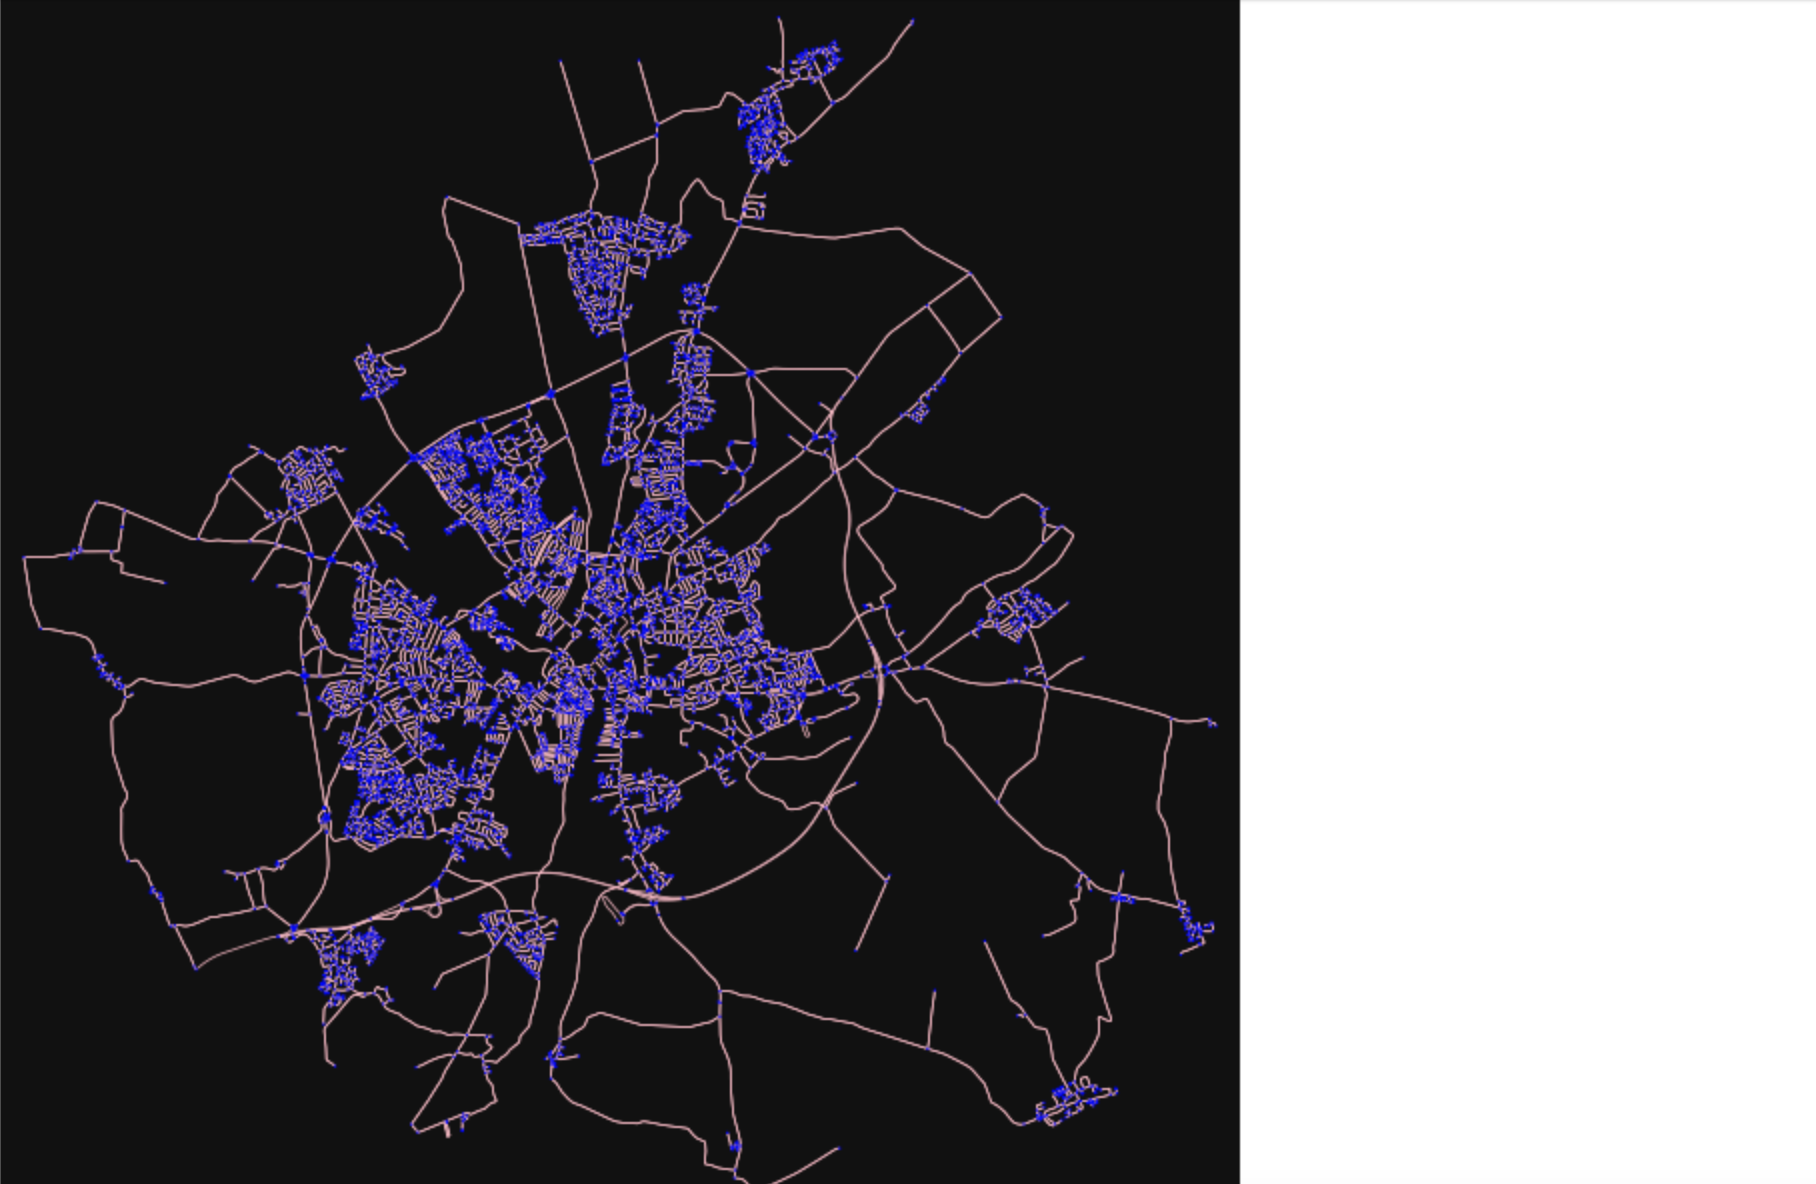

4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.

In [ ]:
H = ox.speed.add_edge_speeds(H)
H = ox.speed.add_edge_travel_times(H)
origin = ox.distance.nearest_nodes(H, X=-1.1217911, Y=53.95864) # railway station 
destination = ox.distance.nearest_nodes(H, X=-1.0844954, Y=53.9623323) # cathedral
route = ox.shortest_path(H, origin, destination, weight="travel_time")
fig, ax = ox.plot_graph_route(H, route, node_size=0)

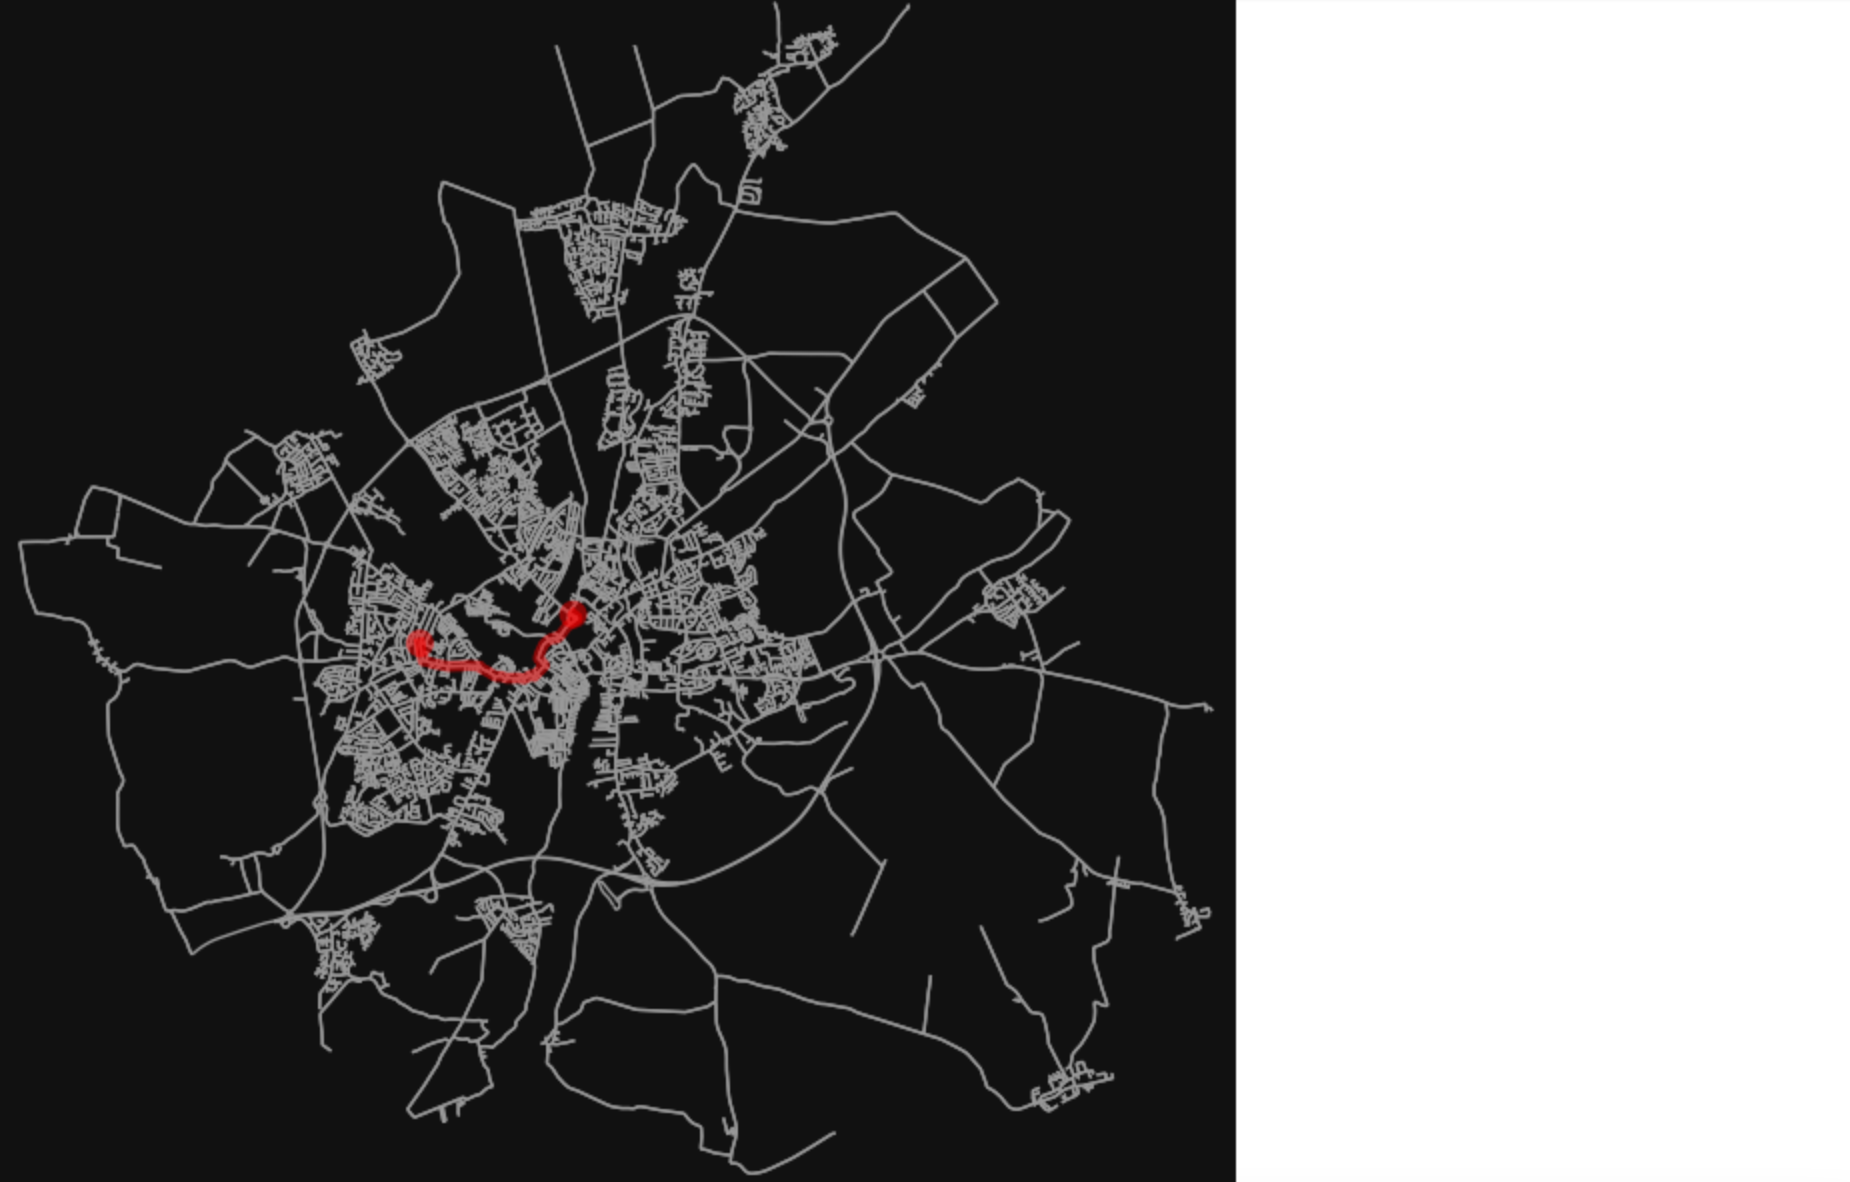

5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.

In [ ]:
degree_centrality_challenge = nx.degree_centrality(H)

In [ ]:
between_centrality_challenge = nx.betweenness_centrality(H) 
# takes a long long time to run but does get there eventually

In [ ]:
edge_centrality_challenge = nx.closeness_centrality(nx.line_graph(H))
nx.set_edge_attributes(H, edge_centrality_challenge, "edge_centrality")
ec = ox.plot.get_edge_colors_by_attr(H, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(H, edge_color=ec, edge_linewidth=2, node_size=0)

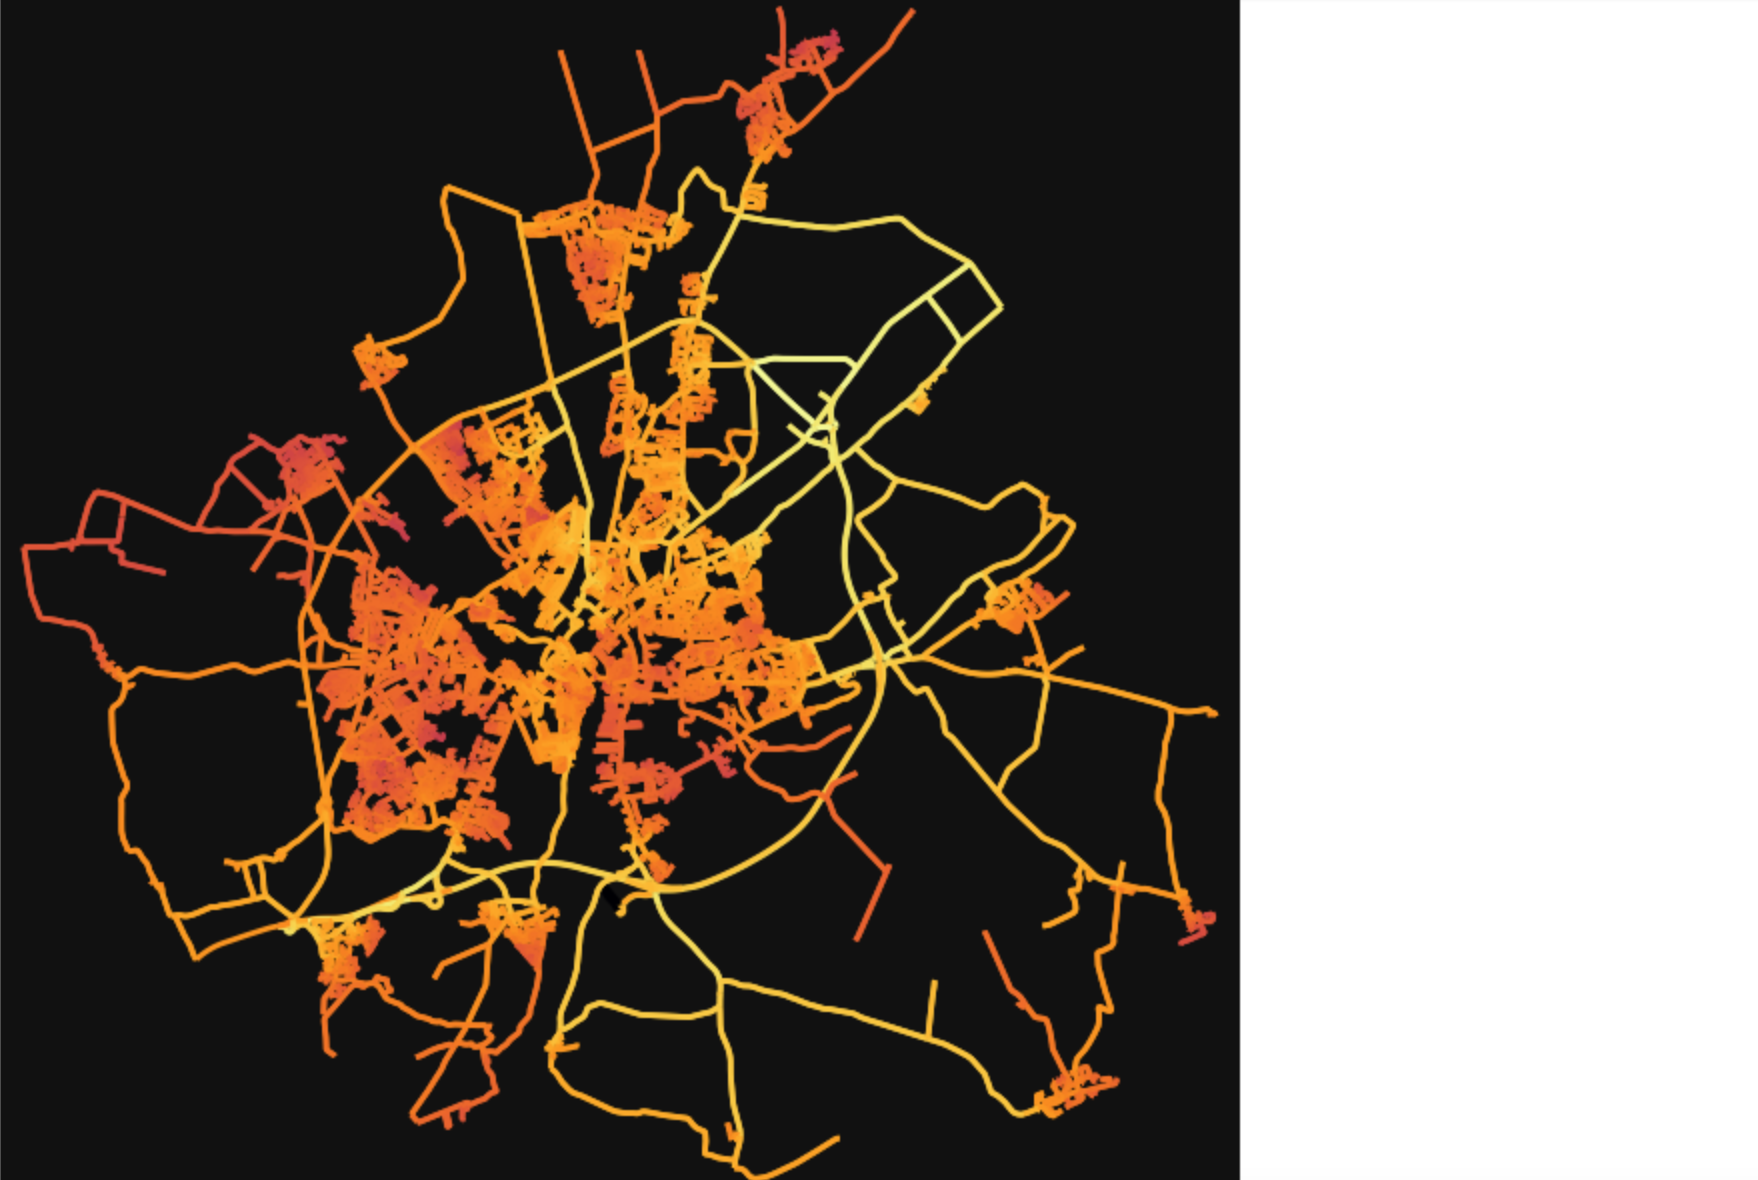

6. Create the figure-ground from the selected city

In [ ]:
img_folder = "images"
extension = "png"
size = 240
dpi = 40

In [ ]:
place = "york"
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    H,
    network_type="all",
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

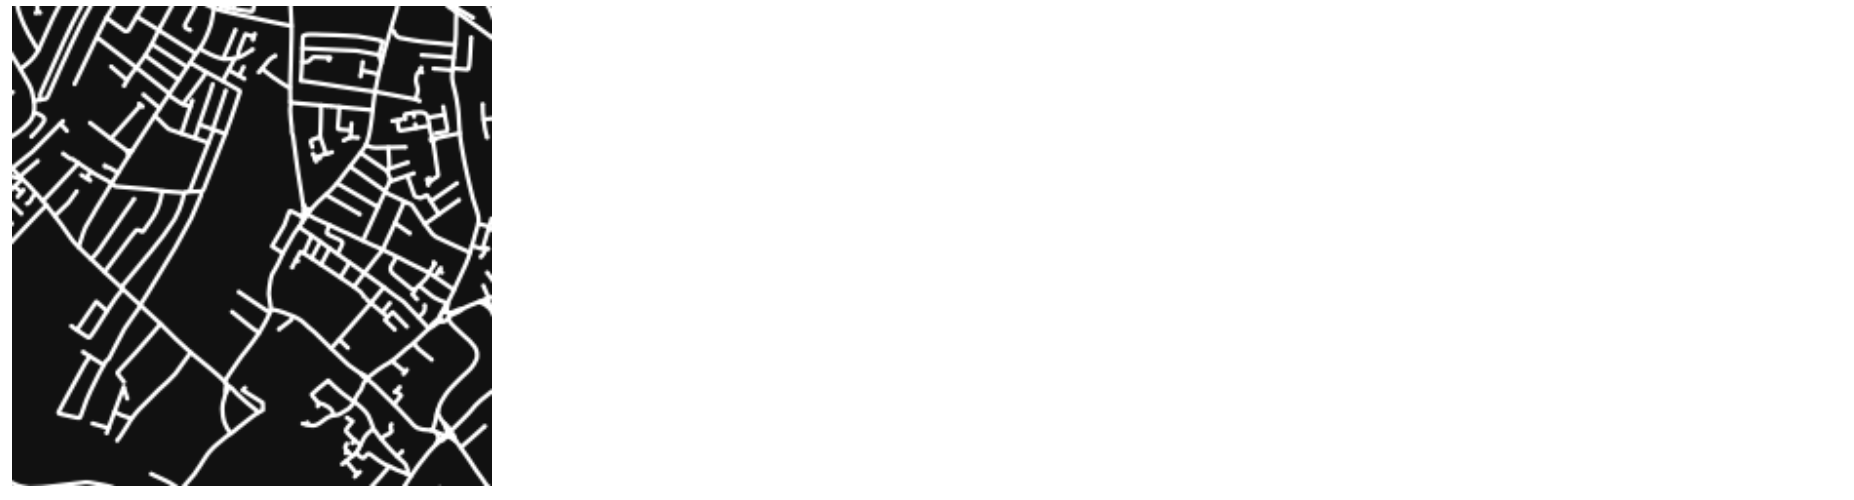

7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.

In [ ]:
nodes, edges = ox.graph_to_gdfs(H)
m = edges.explore(color="blue", tiles="cartodbdarkmatter", column="edge_centrality", cmap="plasma")
nodes.explore(m=m, color="pink", marker_kwds={"radius": 2})

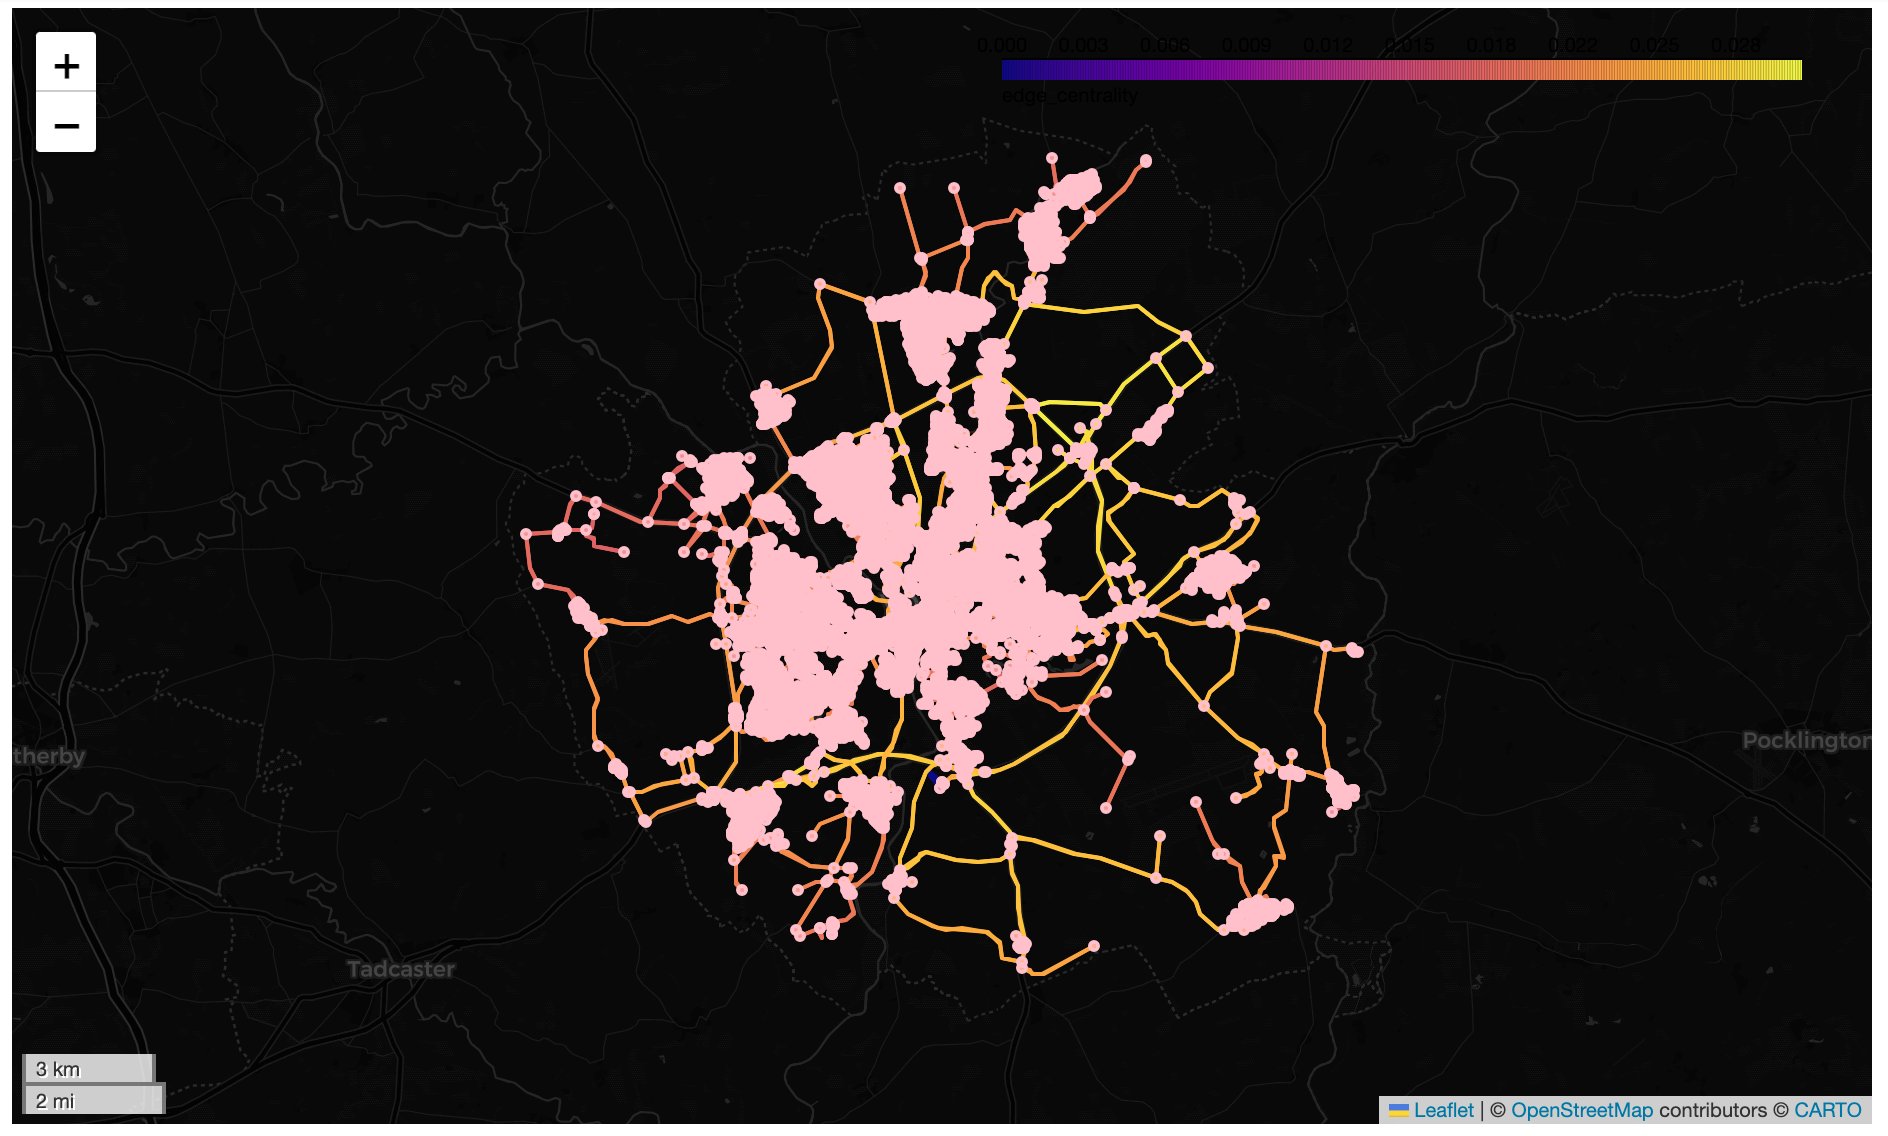

8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.

In [ ]:
# exporting it
ox.save_graph_geopackage(H, filepath="./data/lab5/yorknetwork.gpkg")

In [ ]:
# reading it in to prove it works
N = gpd.read_file("data/lab5/yorknetwork.gpkg")
N.explore()

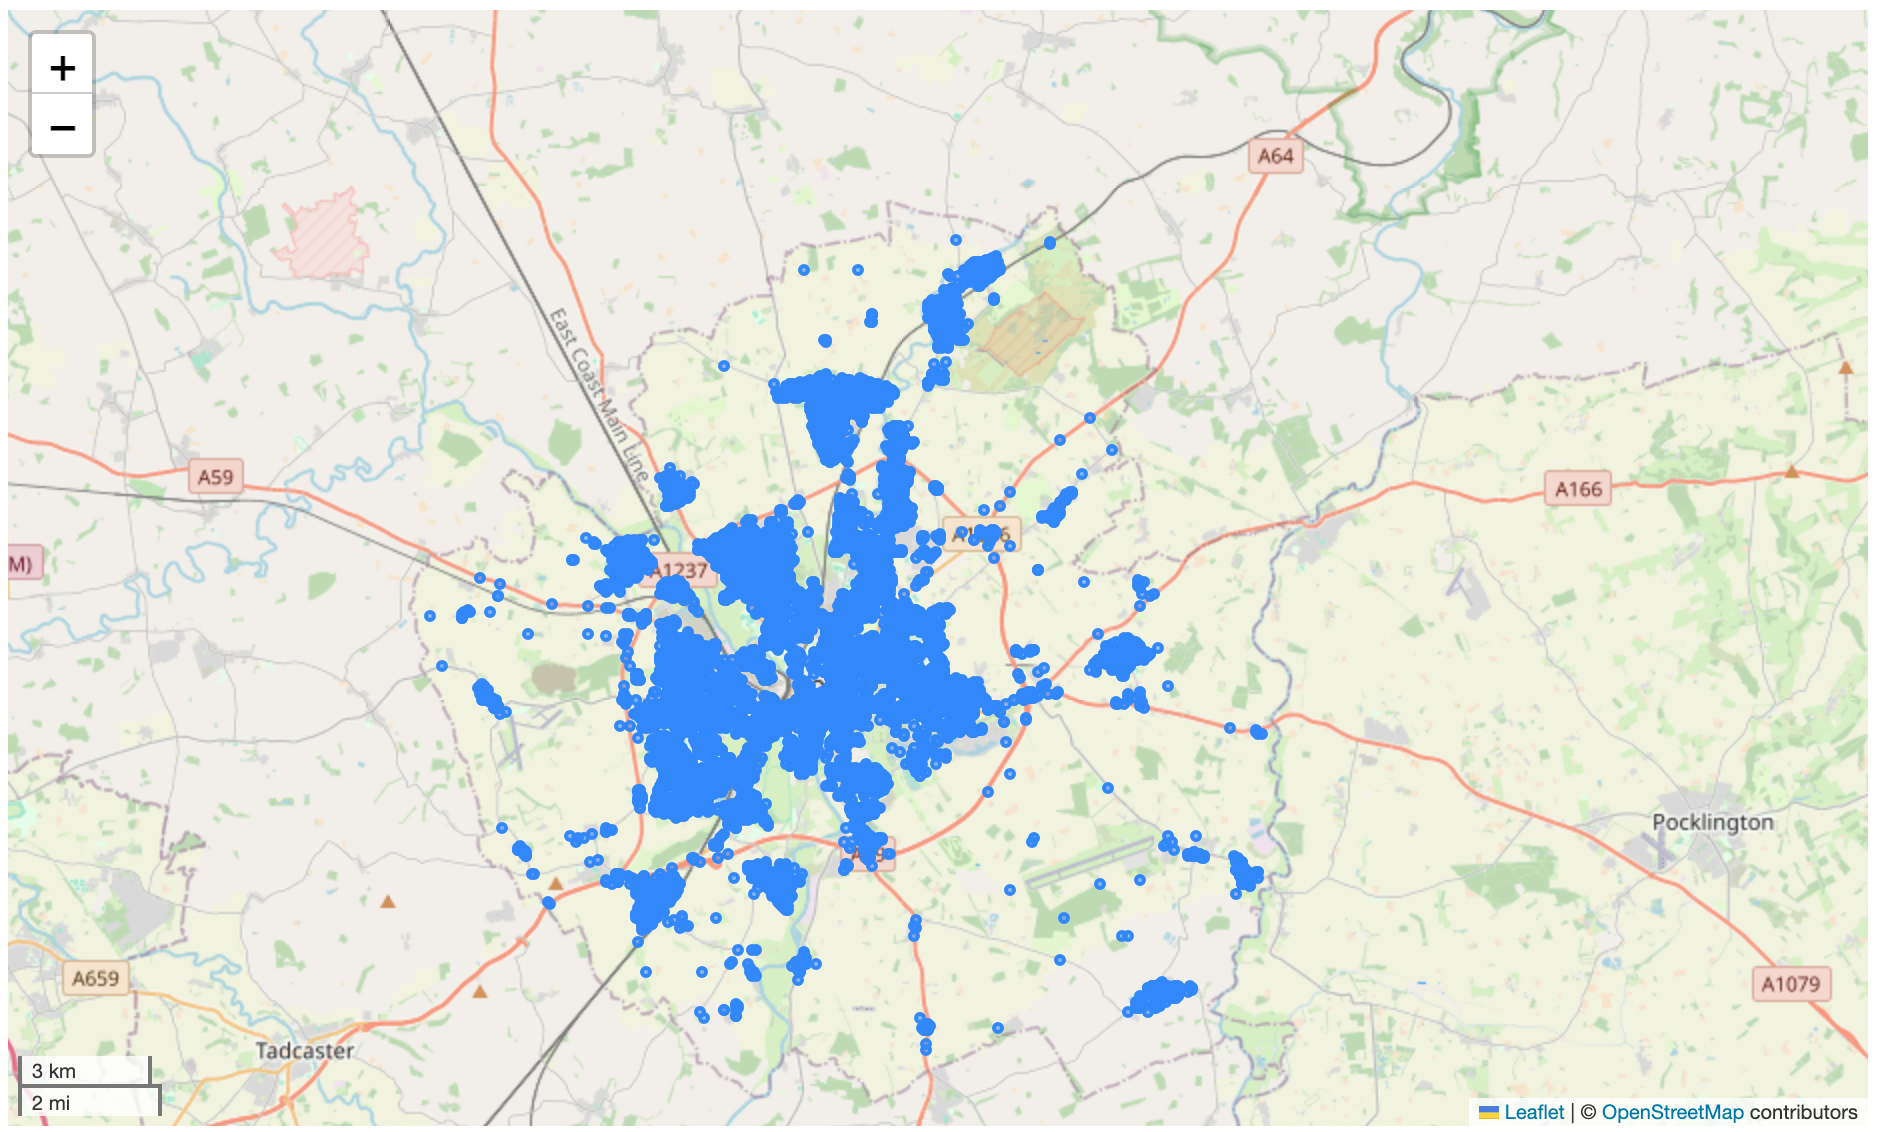

9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

In [ ]:
tags = {"building": True,
        "park": True
       } # plotting buildings and parks
gdf = ox.features_from_place(place, tags) # place defined as York in earlier code
gdf.shape

In [ ]:
warnings.simplefilter('ignore', DeprecationWarning)
fig, ax = ox.plot_footprints(gdf, figsize=(6, 6))

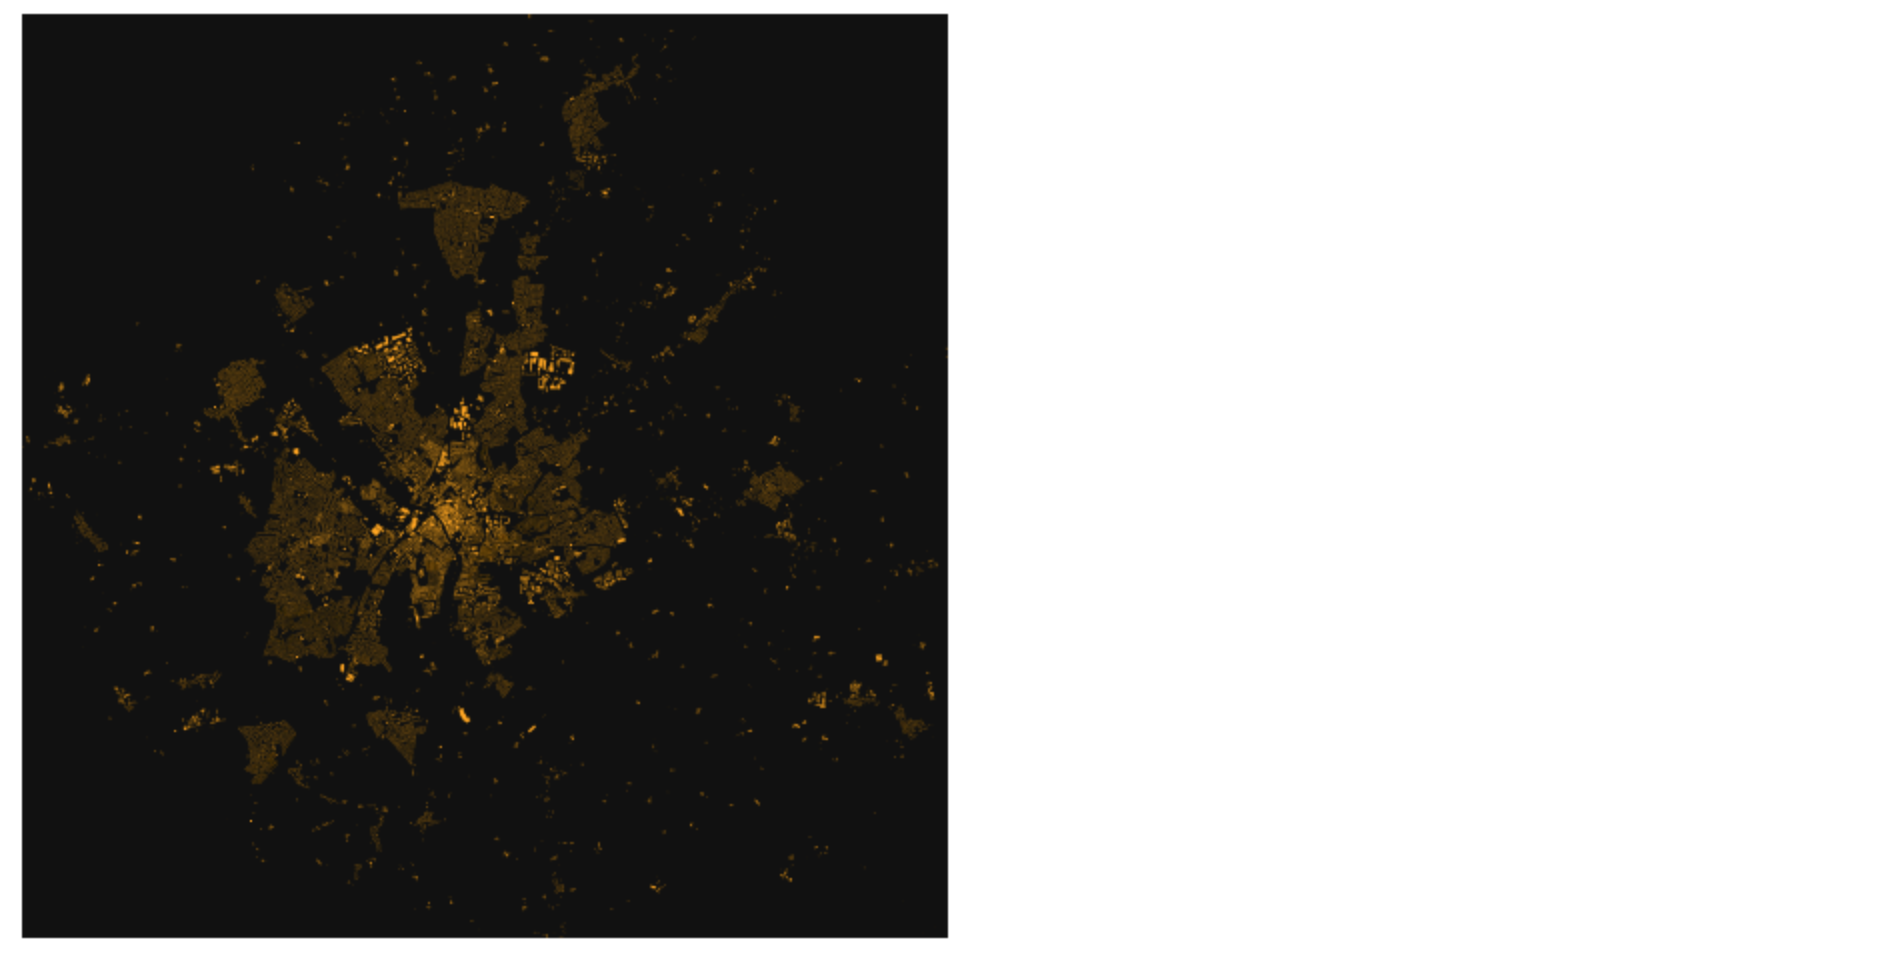